## **KMeans**

### **Importing Necessary Libraries**

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random

### **Importing Dataset**

In [2]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

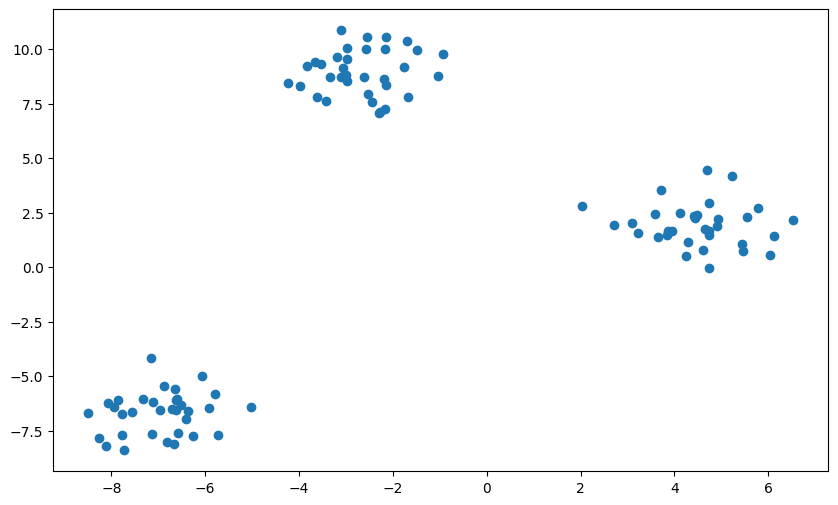

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])

### **KMeans**

In [4]:
class KMeans:
    def __init__(self, n_clusters: int, max_iter: int = 100) -> None:
        self.n_clusters: int = n_clusters
        self.max_iter: int = max_iter

    def fit_predict(self, X):
        self.centroids = X[random.sample(
            range(0, X.shape[0]), self.n_clusters)]

        for _ in range(self.max_iter):
            cluster_label = self.__assign_clusters(X)
            old_centroids = self.centroids
            self.centroids = self.__move_centroids(X, cluster_label)

            if (old_centroids == self.centroids).all():
                break

        return cluster_label

    def __assign_clusters(self, X):
        cluster_label: list = []
        for row in X:
            cluster_label.append(
                np.argmin(np.linalg.norm(self.centroids - row, axis=1)))

        return np.array(cluster_label)

    def __move_centroids(self, X, cluster_label):
        new_centroids: list = []
        for label in np.unique(cluster_label):
            new_centroids.append(X[cluster_label == label].mean(axis=0))

        return np.array(new_centroids)

In [5]:
km = KMeans(n_clusters=3, max_iter=100)
pred = km.fit_predict(X)
pred

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int64)

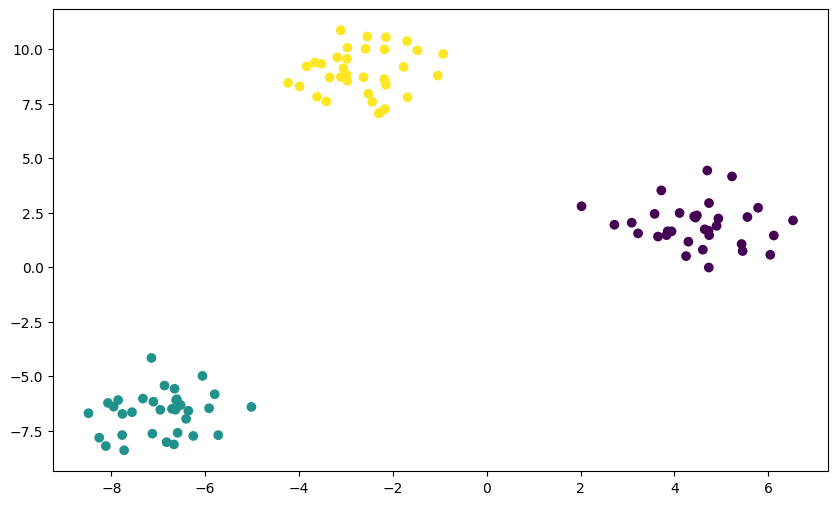

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=pred)